In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [8]:
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
# metadata 
# print(rt_iot2022.metadata) 
# variable information 
# print(rt_iot2022.variables) 

In [19]:
np.unique(y)

array(['ARP_poisioning', 'DDOS_Slowloris', 'DOS_SYN_Hping',
       'MQTT_Publish', 'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN',
       'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'NMAP_UDP_SCAN',
       'NMAP_XMAS_TREE_SCAN', 'Thing_Speak', 'Wipro_bulb'], dtype=object)

In [23]:
print(X.shape)
print(X.columns)

# no aggregate features
X2=df = X.filter(regex='^((?!max|min|avg|std).)*$')

(123117, 83)
Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.t

In [35]:
X2.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.tot,idle.tot,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,0.0,0.0,0.0,0.0,2282414.913,29729182.96,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,0.0,0.0,0.0,0.0,2028306.961,29855277.06,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,0.0,0.0,0.0,0.0,2281903.982,29842149.02,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,0.0,0.0,0.0,0.0,2047288.179,29913774.97,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,0.0,0.0,0.0,0.0,2087656.975,29814704.90,64240,26847,502


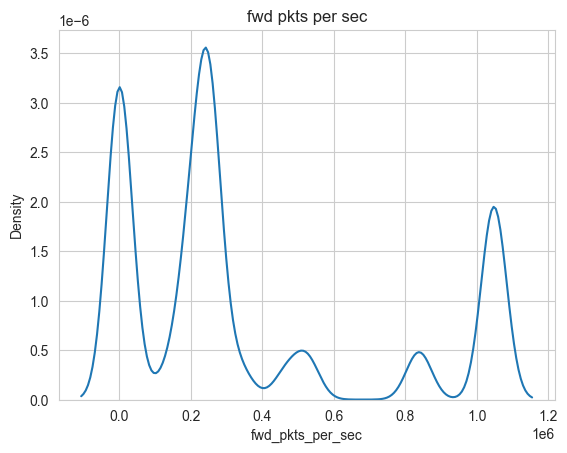

In [50]:
sns.set_style('whitegrid')
plt.title('fwd pkts per sec')
sns.kdeplot(X2['fwd_pkts_per_sec'])
plt.show()

In [52]:
y.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [51]:
full_data=pd.concat([X2,y], axis=1)
values_to_match=['ARP_poisioning', 'DDOS_Slowloris', 'DOS_SYN_Hping',
                 'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN',
                 'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'NMAP_UDP_SCAN',
                 'NMAP_XMAS_TREE_SCAN']
anomalous_data=full_data[full_data['Attack_type'].isin(values_to_match)]
anomalous_data=anomalous_data.iloc[:, :-1]
# anomalous_data
print(anomalous_data[anomalous_data.notna().any(axis=1)].shape, anomalous_data.shape)
anomalous_data

(110610, 47) (110610, 47)


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.tot,idle.tot,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
12507,5353,5353,udp,dns,0.000000,1,0,1,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
12508,5353,5353,udp,dns,0.000000,1,0,1,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
12509,53544,443,tcp,-,42.492044,9,7,1,1,0.211804,...,0.0,0.0,0.0,0.0,0.0,1.483885e+06,4.100817e+07,501,118,0
12510,53542,443,tcp,-,42.515244,9,7,1,1,0.211689,...,0.0,0.0,0.0,0.0,0.0,1.605045e+06,4.091021e+07,501,118,0
12511,60654,443,tcp,-,43.726695,8,7,1,0,0.182955,...,0.0,0.0,0.0,0.0,0.0,2.823784e+06,4.090295e+07,501,7,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,5.960464e+00,0.000000e+00,1024,0,1024
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,0.0,0.0,0.0,0.0,0.0,6.914139e+00,0.000000e+00,1024,0,1024
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,5.960464e+00,0.000000e+00,1024,0,1024
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,5.960464e+00,0.000000e+00,1024,0,1024
